Pandemic Preparedness

Imports and Setup

In [64]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from fuzzywuzzy import fuzz, process

In [48]:
 pd.options.display.max_columns = 999

Data

In [91]:
googleSheetsDataset = "https://docs.google.com/spreadsheets/d/1itaohdPiAeniCXNlntNztZ_oRvjh0HsGuJXUJWET008/edit#gid=0"
CSEdatadir = "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports"
excelVersion = "C:\\Users\\garfink2\\Documents\\data\\drinkingwater\\COVID19_2020_open_line_list.xlsx"
gitCovid = "C:\\Users\\garfink2\\Documents\\data\\covid\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports"
nationalCombined = "C:\\Users\\garfink2\\Documents\\data\\drinkingwater\\national_combined\\NATIONAL_FACILITY_FILE.CSV"
usCountyGaz = "C:\\Users\\garfink2\\Documents\\data\\basemap\\2019_Gaz_counties_national\\2019_Gaz_counties_national.txt"

In [92]:
cases = pd.read_excel(excelVersion)

In [93]:
cases.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials'],
      dtype='object')

In [94]:
cases["location"]

0                   NaN
1                   NaN
2        High-Tech Zone
3        High-Tech Zone
4                   NaN
              ...      
21135               NaN
21136               NaN
21137               NaN
21138               NaN
21139               NaN
Name: location, Length: 21140, dtype: object

In [95]:
cases = gpd.GeoDataFrame(cases,geometry=gpd.points_from_xy(cases.longitude,cases.latitude))

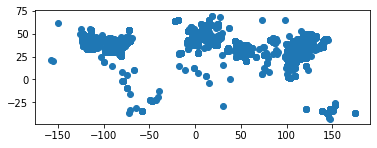

In [96]:
cases.plot()

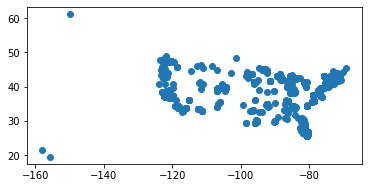

In [102]:
cases[cases["country"] == "United States"].plot()

In [104]:
list(set(cases[cases["country"] == "United States"]["province"]))

['Vermont',
 'Arkansas',
 'Kentucky',
 'New York',
 'Nebraska',
 'Indiana',
 'Rhode Island',
 'Alaska',
 'Massachusetts',
 'Utah',
 'Arizona',
 'Minnesota',
 'Wisconsin',
 'Nevada',
 'South Carolina',
 'Maine',
 'Delaware',
 'Iowa',
 'Hawaii',
 'Maryland',
 'New Mexico',
 'South Dakota',
 'Colorado',
 'Virginia',
 'Georgia',
 'Montana',
 'Oregon',
 'North Carolina',
 'Oklahoma',
 'Illinois',
 'Michigan',
 'Alabama',
 'Wyoming',
 'New Hampshire',
 'California',
 'Pennsylvania',
 'Texas',
 'North Dakota',
 'Idaho',
 'Tennessee',
 'District of Columbia',
 'Florida',
 'Kansas',
 'Connecticut',
 'Washington',
 'Missouri',
 'Ohio',
 'Louisiana',
 'New Jersey',
 'Mississippi']

In [105]:
list(set(cases[cases["country"] == "United States"]["city"]))

[nan,
 'Shoreline',
 'Kent County',
 'Floyd County',
 'Wright County',
 'Trumbull County',
 'Placer County',
 'Loudoun County',
 'Jackson County',
 'Santa Fe County',
 'Tulare County',
 'Minnehaha County',
 'Berkeley',
 'Eagle County',
 'Charlotte County',
 'Tarrant County',
 'Stanislaus County',
 'Solano County',
 'Albany County',
 'Clark County',
 'Wayne County',
 'Dakota County',
 'Stark County',
 'Tampa',
 'Jefferson County',
 'St. Tammany',
 'Okaloosa County',
 'Forrest County',
 'Los Angeles',
 'DeKalb County',
 'Miami-Dade County',
 'Harrisonburg City',
 'San Joaquin County',
 'Chittenden County',
 'Davis County',
 'Pinellas County',
 'Onslow County',
 'South Shore',
 'Williamson County',
 'Collin County',
 'Davidson County',
 'Lancaster County',
 'Kirkland, Snohomish County',
 'Middlesex County',
 "Prince George's County",
 'Socorro County',
 'Lower Merion Township',
 'Duval County',
 'Los Angeles County',
 'New Castle County',
 'Orleans Parish',
 'Orleans County',
 'Harnett Co

In [26]:
dailyUpdates = os.listdir(gitCovid)

In [29]:
a = dailyUpdates[1]

In [35]:
dt.datetime.strptime(a.split('.')[0],"%m-%d-%Y")

datetime.datetime(2020, 1, 22, 0, 0)

In [36]:
dailyUpdatesDict = {}
for file in dailyUpdates:
    if ".csv" in file:
        dailyUpdatesDict[dt.datetime.strptime(file.split('.')[0],"%m-%d-%Y")] = file

In [41]:
[d.month for d in dailyUpdatesDict.keys()]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [43]:
df_nc = pd.read_csv(nationalCombined)

C:\Users\garfink2\AppData\Local\Continuum\anaconda3\envs\phd\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (4,7,11,12,13,14,15,16,21,23,24,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
df_nc.columns

Index(['FRS_FACILITY_DETAIL_REPORT_URL', 'REGISTRY_ID', 'PRIMARY_NAME',
       'LOCATION_ADDRESS', 'SUPPLEMENTAL_LOCATION', 'CITY_NAME', 'COUNTY_NAME',
       'FIPS_CODE', 'STATE_CODE', 'STATE_NAME', 'COUNTRY_NAME', 'POSTAL_CODE',
       'FEDERAL_FACILITY_CODE', 'FEDERAL_AGENCY_NAME', 'TRIBAL_LAND_CODE',
       'TRIBAL_LAND_NAME', 'CONGRESSIONAL_DIST_NUM', 'CENSUS_BLOCK_CODE',
       'HUC_CODE', 'EPA_REGION_CODE', 'SITE_TYPE_NAME', 'LOCATION_DESCRIPTION',
       'CREATE_DATE', 'UPDATE_DATE', 'US_MEXICO_BORDER_IND', 'PGM_SYS_ACRNMS',
       'LATITUDE83', 'LONGITUDE83', 'CONVEYOR', 'COLLECT_DESC',
       'ACCURACY_VALUE', 'REF_POINT_DESC', 'HDATUM_DESC', 'SOURCE_DESC'],
      dtype='object')

In [46]:
list(set(df_nc["SITE_TYPE_NAME"]))

[nan,
 'WATERFRONT FACILITY',
 'MOBILE',
 'MONITORING STATION',
 'BARGE',
 'CONTAMINATED SITE',
 'POTENTIALLY CONTAMINATED SITE',
 'WATER SYSTEM',
 'CONTAMINATION ADDRESSED',
 'STATIONARY',
 'PORTABLE',
 'PIPELINE',
 'FACILITY',
 'BROWNFIELDS SITE']

In [49]:
df_nc[df_nc["SITE_TYPE_NAME"]=="WATER SYSTEM"]

,FRS_FACILITY_DETAIL_REPORT_URL,REGISTRY_ID,PRIMARY_NAME,LOCATION_ADDRESS,SUPPLEMENTAL_LOCATION,CITY_NAME,COUNTY_NAME,FIPS_CODE,STATE_CODE,STATE_NAME,COUNTRY_NAME,POSTAL_CODE,FEDERAL_FACILITY_CODE,FEDERAL_AGENCY_NAME,TRIBAL_LAND_CODE,TRIBAL_LAND_NAME,CONGRESSIONAL_DIST_NUM,CENSUS_BLOCK_CODE,HUC_CODE,EPA_REGION_CODE,SITE_TYPE_NAME,LOCATION_DESCRIPTION,CREATE_DATE,UPDATE_DATE,US_MEXICO_BORDER_IND,PGM_SYS_ACRNMS,LATITUDE83,LONGITUDE83,CONVEYOR,COLLECT_DESC,ACCURACY_VALUE,REF_POINT_DESC,HDATUM_DESC,SOURCE_DESC
955,http://ofmpub.epa.gov/enviro/fii_query_detail....,110007236623,WATER SERVICES,AHKOVAK ST,NaN,UTQIAGVIK,NORTH SLOPE,NaN,AK,ALASKA,UNITED STATES,99723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,WATER SYSTEM,NaN,01-MAR-2000 00:00:00,25-APR-2019 18:36:09,NaN,SFDW:AK2320230,NaN,NaN,NaN,NaN,NaN,NaN,NAD83,NaN
3093,http://ofmpub.epa.gov/enviro/fii_query_detail....,110012948061,MOUNTAIN POINT SERVICE AREA,MAYO LN,NaN,KETCHIKAN,KETCHIKAN GATEWAY,NaN,AK,ALASKA,UNITED STATES,99901,NaN,NaN,NaN,NaN,00,2.130000e+13,19010102.0,10.0,WATER SYSTEM,NaN,30-OCT-2002 18:12:08,11-APR-2017 11:49:19,NaN,SFDW:AK2120452,55.302290,-131.535337,EPA_SLT,INTERPOLATION-PHOTO,588.0,FACILITY CENTROID,NAD83,NaN
3094,http://ofmpub.epa.gov/enviro/fii_query_detail....,110012948089,KASAAN,BARONOVICH RD,LINCKUM CREEK,THORNE BAY,PRINCE OF WALES-HYDER,NaN,AK,ALASKA,UNITED STATES,99919,NaN,NaN,NaN,NaN,00,2.198000e+13,19010103.0,10.0,WATER SYSTEM,NaN,30-OCT-2002 18:12:08,11-APR-2017 12:11:49,NaN,SFDW:AK2120606,55.542218,-132.400424,EPA_SLT,INTERPOLATION-PHOTO,586.0,FACILITY CENTROID,NAD83,NaN
3095,http://ofmpub.epa.gov/enviro/fii_query_detail....,110012948196,ANGOON PUBLIC WATER,AUKLA ST,NaN,ANGOON,HOONAH-ANGOON,NaN,AK,ALASKA,UNITED STATES,99820,NaN,NaN,NaN,NaN,00,2.105000e+13,19010204.0,10.0,WATER SYSTEM,NaN,30-OCT-2002 18:12:10,11-APR-2017 12:18:27,NaN,SFDW:AK2130017,57.461740,-134.522502,EPA_SLT,INTERPOLATION-PHOTO,1112.0,FACILITY CENTROID,NAD83,NaN
3096,http://ofmpub.epa.gov/enviro/fii_query_detail....,110012948258,HOONAH PWS,HUNA CT,NaN,HOONAH,HOONAH-ANGOON,NaN,AK,ALASKA,UNITED STATES,99829,NaN,NaN,NaN,NaN,00,2.105000e+13,19010203.0,10.0,WATER SYSTEM,NaN,30-OCT-2002 18:12:11,11-APR-2017 12:33:37,NaN,SFDW:AK2130067,58.110348,-135.432715,EPA_SLT,INTERPOLATION-PHOTO,546.0,FACILITY CENTROID,NAD83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219017,http://ofmpub.epa.gov/enviro/fii_query_detail....,110063367636,ALL SEASONS RV PARK,NaN,NaN,NaN,CAMPBELL,NaN,WY,WYOMING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,WATER SYSTEM,NaN,27-JAN-2015 21:04:28,19-MAY-2015 04:58:51,NaN,SFDW:WY5601658,NaN,NaN,NaN,NaN,NaN,NaN,NAD83,NaN
4219018,http://ofmpub.epa.gov/enviro/fii_query_detail....,110063370926,BRINTON MUSEUM,NaN,NaN,NaN,SHERIDAN,NaN,WY,WYOMING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,WATER SYSTEM,NaN,27-JAN-2015 21:04:38,18-MAY-2015 17:42:03,NaN,SFDW:WY5601677,NaN,NaN,NaN,NaN,NaN,NaN,NAD83,NaN
4219019,http://ofmpub.epa.gov/enviro/fii_query_detail....,110063371499,SWEETWATER IMPROVEMENT & SERVICE DISTRIC,NaN,NaN,NaN,WESTON,NaN,WY,WYOMING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,WATER SYSTEM,NaN,27-JAN-2015 21:04:40,18-MAY-2015 15:03:42,NaN,SFDW:WY5601675,NaN,NaN,NaN,NaN,NaN,NaN,NAD83,NaN
4219020,http://ofmpub.epa.gov/enviro/fii_query_detail....,110063374352,WY DOT-SOUTH EAST WELCOME CENTER,NaN,NaN,NaN,LARAMIE,NaN,WY,WYOMING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,WATER SYSTEM,NaN,27-JAN-2015 21:04:55,18-MAY-2015 12:19:31,NaN,SFDW:WY5601678,NaN,NaN,NaN,NaN,NaN,NaN,NAD83,NaN


In [50]:
# https://ofmpub.epa.gov/apex/sfdw/f?p=108:103:::NO:RP::
# great and wroks but doesn't have gis

Fuzzy Wuzzy Gazetteer

https://github.com/seatgeek/fuzzywuzzy

In [57]:
gaz = pd.read_csv(usCountyGaz,delimiter='\t')

In [58]:
gaz.head()

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1539602137,25706961,594.444,9.926,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4117621645,1132980868,1589.823,437.446,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2292160139,50523213,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1612167476,9602089,622.461,3.707,33.015893,-87.127148
4,AL,1009,161530,Blount County,1670103866,15015467,644.831,5.798,33.977358,-86.566440


In [59]:
names = gaz["NAME"]

In [75]:
testSearch = "St Louis"

In [89]:
testSearch = "St Louis County"

In [76]:
testSearch = testSearch.upper()

In [73]:
testSearch = "St. Louis"

In [90]:
process.extract(testSearch,names,limit=20)

[('St. Louis County', 97, 1382),
 ('St. Louis County', 97, 1578),
 ('Lee County', 86, 40),
 ('Lee County', 86, 149),
 ('Bay County', 86, 322),
 ('Lee County', 86, 354),
 ('Lee County', 86, 474),
 ('Ada County', 86, 551),
 ('Gem County', 86, 573),
 ('Lee County', 86, 646),
 ('Jay County', 86, 734),
 ('Ida County', 86, 835),
 ('Lee County', 86, 844),
 ('Louisa County', 86, 846),
 ('Sac County', 86, 869),
 ('Elk County', 86, 912),
 ('Lee County', 86, 1057),
 ('St. John the Baptist Parish', 86, 1160),
 ('Bay County', 86, 1239),
 ('Lake of the Woods County', 86, 1352)]

In [80]:
len(names)

3220

In [88]:
np.sum(["County" in x for x in names])

3007

SIR Model

https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

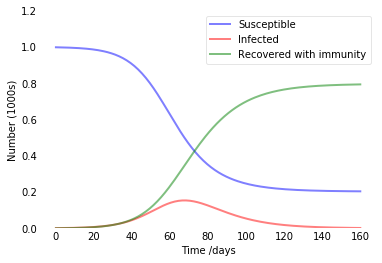

In [108]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)